# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [36]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nmd/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [38]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [39]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy')
btc_articles['totalResults']

7170

In [40]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy')
eth_articles['totalResults']

2419

In [42]:
# Create the Bitcoin sentiment scores DataFrame
def get_sentiment_score(article, based_on):
    sentiments = []

    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text
            })

        except AttributeError:
            pass

    df = pd.DataFrame(sentiments)
    return df

btc_sentiment_df = get_sentiment_score(btc_articles, 'content')
btc_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,-0.3400,0.061,0.939,0.000,When my wife started a little garden in our ur...
1,0.6908,0.000,0.822,0.178,"Like Dogecoin devotees, the mayor of Reno, and..."
2,0.6240,0.000,0.873,0.127,To get a roundup of TechCrunchs biggest and mo...
3,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...
4,0.2732,0.000,0.903,0.097,"As longtime TechCrunch readers know well, Mich..."
5,0.1280,0.075,0.836,0.089,"SINGAPORE, July 28 (Reuters) - Bitcoin broke a..."
6,-0.4767,0.088,0.912,0.000,James Martin/CNET\r\nA UK man was arrested in ...
7,0.0000,0.000,1.000,0.000,A representation of virtual currency bitcoin i...
8,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A representati...
9,0.4588,0.000,0.917,0.083,REUTERS/Dado Ruvic/Illustration\r\nWelcome to ...


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment_df = get_sentiment_score(eth_articles, 'content')
eth_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,0.3612,0.000,0.925,0.075,There are many blockchain platforms competing ...
1,-0.2411,0.061,0.939,0.000,Blockchain infrastructure startups are heating...
2,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...
3,0.6956,0.000,0.810,0.190,Cent was founded in 2017 as an ad-free creator...
4,0.0000,0.000,1.000,0.000,Representation of the Ethereum virtual currenc...
5,0.0000,0.000,1.000,0.000,"HONG KONG, Aug 5 (Reuters) - Ether held near t..."
6,0.0000,0.000,1.000,0.000,Representations of cryptocurrencies Bitcoin an...
7,0.3400,0.000,0.895,0.105,Cryptocurrencies spiked Monday after Amazon li...
8,0.6369,0.000,0.843,0.157,"""Anthony Di Iorio, a co-founder of the Ethereu..."
9,0.0000,0.000,1.000,0.000,Representations of cryptocurrency Ethereum are...


In [8]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.048400,0.046450,0.89415,0.059400
std,0.463778,0.083549,0.09326,0.059611
min,-0.827100,0.000000,0.65300,0.000000
25%,-0.307000,0.000000,0.85325,0.000000
50%,0.000000,0.000000,0.91050,0.056000
75%,0.445000,0.076250,0.95425,0.092500
max,0.726400,0.287000,1.00000,0.178000


In [9]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.00000,20.00000,20.000000
mean,0.174515,0.01345,0.93050,0.056050
std,0.312339,0.02766,0.08117,0.073898
min,-0.340000,0.00000,0.78200,0.000000
25%,0.000000,0.00000,0.84275,0.000000
50%,0.000000,0.00000,0.96950,0.000000
75%,0.402575,0.00000,1.00000,0.129500
max,0.726400,0.07200,1.00000,0.190000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin with 0.059611

Q: Which coin had the highest compound score?

A: Bitcoin and etherem have the same score with 0.726400

Q. Which coin had the highest positive score?

A: Ethereum - 0.19

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = set(stopwords.words('english'))

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean.lower())
    
    # Lemmatize words into root words
    root_words = [lemmatizer.lemmatize(word) for word in words]
   
   # Convert the words to lowercase and Remove the stop words
    words = [word for word in words if word not in stop_words]
    
    return root_words

In [13]:
# Create a new tokens column for Bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,-0.3400,0.061,0.939,0.000,When my wife started a little garden in our ur...,"[when, my, wife, started, a, little, garden, i..."
1,0.6908,0.000,0.822,0.178,"Like Dogecoin devotees, the mayor of Reno, and...","[like, dogecoin, devotee, the, mayor, of, reno..."
2,0.6240,0.000,0.873,0.127,To get a roundup of TechCrunchs biggest and mo...,"[to, get, a, roundup, of, techcrunchs, biggest..."
3,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...,"[while, retail, investor, grew, more, comforta..."
4,0.2732,0.000,0.903,0.097,"As longtime TechCrunch readers know well, Mich...","[a, longtime, techcrunch, reader, know, well, ..."


In [14]:
# Create a new tokens column for Ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,0.3612,0.000,0.925,0.075,There are many blockchain platforms competing ...,"[there, are, many, blockchain, platform, compe..."
1,-0.2411,0.061,0.939,0.000,Blockchain infrastructure startups are heating...,"[blockchain, infrastructure, startup, are, hea..."
2,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...,"[while, retail, investor, grew, more, comforta..."
3,0.6956,0.000,0.810,0.190,Cent was founded in 2017 as an ad-free creator...,"[cent, wa, founded, in, 2017, a, an, adfree, c..."
4,0.0000,0.000,1.000,0.000,Representation of the Ethereum virtual currenc...,"[representation, of, the, ethereum, virtual, c..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(btc_sentiment_df)
eth_tokens = get_tokens(eth_sentiment_df)

def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count


In [16]:
# Generate the Bitcoin N-grams where N=2
bigram_btc = bigram_counter(btc_tokens, 2)

In [17]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
top_10_token_btc = token_count(btc_tokens)
top_10_token_btc

[('a', 28),
 ('of', 20),
 ('char', 19),
 ('the', 18),
 ('in', 17),
 ('and', 11),
 ('is', 10),
 ('to', 10),
 ('bitcoin', 10),
 ('for', 8)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
top_10_token_eth = token_count(eth_tokens)
top_10_token_eth

[('the', 21),
 ('char', 20),
 ('a', 18),
 ('of', 16),
 ('ethereum', 15),
 ('in', 13),
 ('to', 11),
 ('this', 10),
 ('are', 9),
 ('for', 9)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

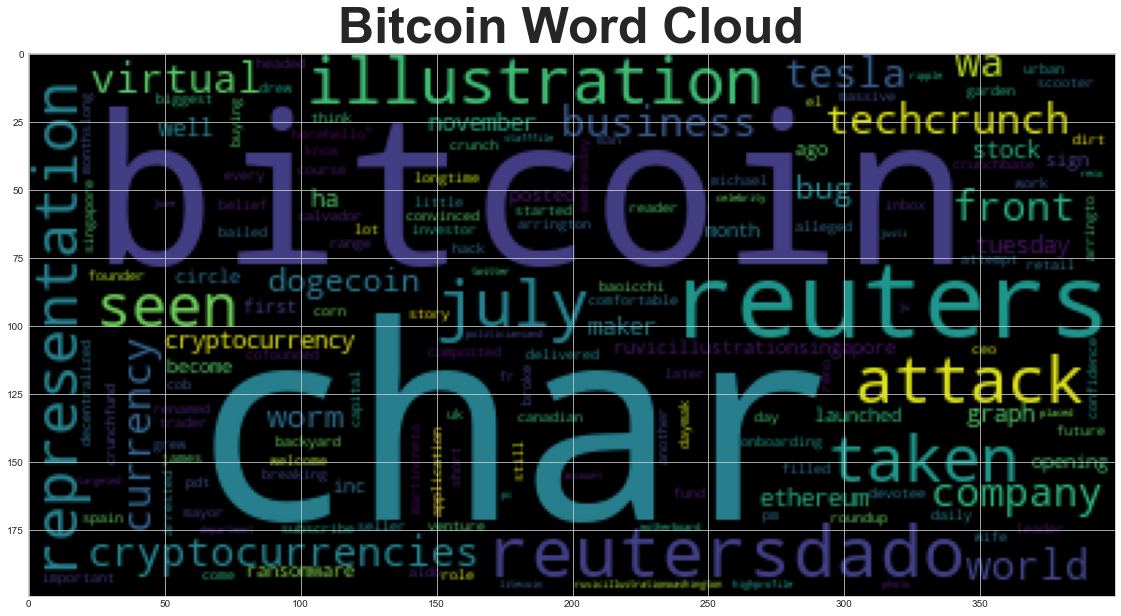

In [22]:
# Generate the Bitcoin word cloud
wc = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

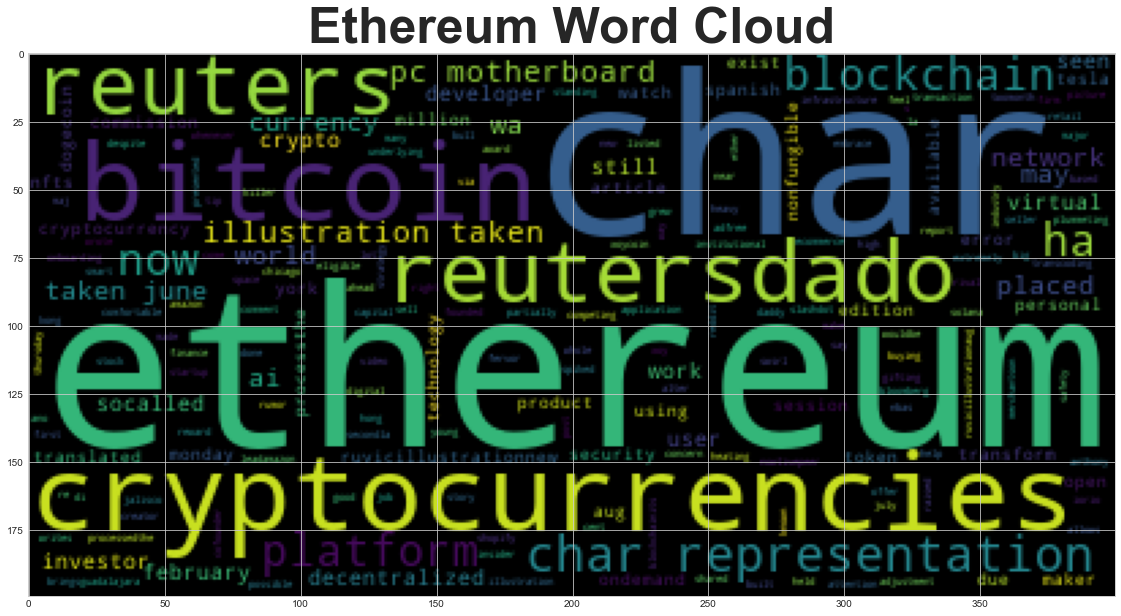

In [23]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_sentiment_df['content'])

In [28]:
# Run the NER processor on all of the text
doc= nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [29]:
# Render the visualization
displacy.render(doc, style='ent')

In [30]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
SINGAPORE GPE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
James Martin/CNET PERSON
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration
SINGAPORE ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Ju PERSON
REUTERS ORG
Dado Ruvic/Illustration
 PERSON
10 CARDINAL
the Opening Bell ORG
first ORDINAL
Entrepreneur ORG
first ORDINAL
more than three decades ago DATE
six months ago DATE
dozens CARDINAL
February 9, 2021 DATE
REUTERS ORG
Dado GPE
Reuters ORG
Tesla Inc ORG
2020 DATE
Kaseya PERSON
Russian NORP
hundreds CARDINAL
Co

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(eth_sentiment_df['content'])

In [32]:
# Run the NER processor on all of the text
doc= nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(doc, style='ent')

In [34]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
2017 DATE
Reddit NORP
Ethereum PERSON
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
HONG KONG GPE
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Amazon ORG
Anthony Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
Monday DATE
Chicago Bulls ORG
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DATE
Clie PERSON
Hackaday DATE
Proof of Work WORK_OF_ART
Bitcoin, Ethereum ORG
P

---